# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
ltc_url = "https://api.alternative.me/v2/ticker/Litecoin/?convert=CAD"
link_url = "https://api.alternative.me/v2/ticker/Chainlink/?convert=CAD"
ada_url = "https://api.alternative.me/v2/ticker/Cardano/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc_request = requests.get(btc_url).json()
btc_request

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18733525,
   'total_supply': 18733525,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 35020.0,
     'volume_24h': 31757321702,
     'market_cap': 657834107248,
     'percentage_change_1h': -0.918028457870543,
     'percentage_change_24h': -1.45039527340021,
     'percentage_change_7d': -1.48357245464502,
     'percent_change_1h': -0.918028457870543,
     'percent_change_24h': -1.45039527340021,
     'percent_change_7d': -1.48357245464502},
    'CAD': {'price': 42566.81,
     'volume_24h': 38601024528.781,
     'market_cap': 799597357359.944,
     'percent_change_1h': -0.918028457870543,
     'percent_change_24h': -1.45039527340021,
     'percent_change_7d': -1.48357245464502}},
   'last_updated': 1623557698}},
 'metadata': {'timestamp': 1623557698,
  'num_cryptocurrencies': 1291,
  'error': None}}

In [6]:
eth_request = requests.get(eth_url).json()
eth_request

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116269208,
   'total_supply': 116269208,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2342.63,
     'volume_24h': 26562672032,
     'market_cap': 273237738133,
     'percentage_change_1h': -1.50844075437395,
     'percentage_change_24h': 1.87815117123663,
     'percentage_change_7d': -10.7492285544013,
     'percent_change_1h': -1.50844075437395,
     'percent_change_24h': 1.87815117123663,
     'percent_change_7d': -10.7492285544013},
    'CAD': {'price': 2847.466765,
     'volume_24h': 32286927854.896,
     'market_cap': 332120470700.662,
     'percent_change_1h': -1.50844075437395,
     'percent_change_24h': 1.87815117123663,
     'percent_change_7d': -10.7492285544013}},
   'last_updated': 1623557697}},
 'metadata': {'timestamp': 1623557697,
  'num_cryptocurrencies': 1291,
  'error': None}}

In [7]:
# Fetch current BTC price
btc_price_cad = btc_request["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_price_cad = eth_request["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price_cad
my_eth_value = my_eth * eth_price_cad

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51080.17
The current value of your 5.3 ETH is $15091.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-12", tz="America/New_York").isoformat()
starting_day = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    start = starting_day,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_stocks

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2017-06-22 00:00:00-04:00  110.06  110.0947  109.9500  110.050   1295361   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.9800  110.070   1101304   
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.160   1364100   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.830   2883305   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.850  12016805   
...                           ...       ...       ...      ...       ...   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595   3639918   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820   3951702   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050   3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300   3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240   3476373   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-06-22 00:00:00-04:00  242.97  243.530  242.640  242.83  32991335  
2017-06-23 00:00:00-04:00  242.91  243.510  242.470  243.16  45792641  
2017-06-26 00:00:00-04:00  243.89  244.380  243.045  243.27  43153677  
2017-06-27 00:00:00-04:00  243.04  243.380  241.310  241.36  60858189  
2017-06-28 00:00:00-04:00  242.50  243.715  242.230  243.46  50076355  
...                           ...      ...      ...     ...       ...  
2021-06-07 00:00:00-04:00  422.59  422.780  421.190  422.23  41442963  
2021-06-08 00:00:00-04:00  423.11  423.210  420.320  422.27  40131441  
2021-06-09 00:00:00-04:00  423.18  423.260  421.410  421.62  38368598  
2021-06-10 00:00:00-04:00  422.96  424.630  421.550  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.420  422.820  424.31  37018077  

[1000 rows x 10 columns]

In [11]:
# Pick AGG and SPY close prices
spy_close_price = df_stocks["SPY"]["close"][-1]
agg_close_price = df_stocks["AGG"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.24
Current SPY closing price: $424.31


In [12]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21215.50
The current value of your 200 AGG shares is $23048.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

amount_data = {
    "amount": [crypto, shares]
}

asset = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=asset)

# Display savings DataFrame
display(df_savings)

,amount
crypto,66171.745854
shares,44263.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

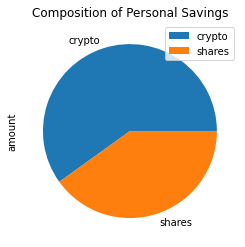

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations on reaching this financial goal.")
elif total_savings < emergency_fund:
    print(f"You need {emergency_fund - total_savings} to reach this financial goal.")
                

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-12', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-06-21 00:00:00-04:00  109.88  110.0400  109.8800  109.98  1085301.0   
2017-06-22 00:00:00-04:00  110.06  110.0947  109.9500  110.05  1295361.0   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.9800  110.07  1101304.0   
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.16  1364100.0   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.83  2883305.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2017-06-21 00:00:00-04:00     NaN     NaN      NaN     NaN         NaN  
2017-06-22 00:00:00-04:00  242.97  243.53  242.640  242.83  32991335.0  
2017-06-23 00:00:00-04:00  242.91  243.51  242.470  243.16  45792641.0  
2017-06-26 00:00:00-04:00  243.89  244.38  243.045  243.27  43153677.0  
2017-06-27 00:00:00-04:00  243.04  243.38  241.310  241.36  60858189.0

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-06-21 00:00:00-04:00  109.88  110.0400  109.8800  109.98  1085301.0   
2017-06-22 00:00:00-04:00  110.06  110.0947  109.9500  110.05  1295361.0   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.9800  110.07  1101304.0   
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.16  1364100.0   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.83  2883305.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-06-21 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2017-06-22 00:00:00-04:00     0.000636  242.97  243.53  242.640  242.83   
2017-06-23 00:00:00-04:00     0.000182  242.91  243.51  242.470  243.16   
2017-06-26 00:00:00-04:00     0.000818  243.89  244.38  243.045  243.27   
2017-06-27 00:00:00-04:00    -0.002996  243.04  243.38  241.310  241.36   

                                                    
                               volume daily_return  
time                                                
2017-06-21 00:00:00-04:00         NaN          NaN  
2017-06-22 00:00:00-04:00  32991335.0          NaN  
2017-06-23 00:00:00-04:00  45792641.0     0.001359  
2017-06-26 00:00:00-04:00  43153677.0     0.000452  
2017-06-27 00:00:00-04:00  60858189.0    -0.007851

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998681,1.005706,0.996440,1.005301,0.991098,1.005240,1.000938,0.999523,0.999689,0.991027,...,0.996290,0.996731,1.000096,1.008958,1.008072,1.000383,0.996876,0.996621,1.001437,1.003167
2,1.005863,1.020956,1.005321,1.007161,0.990488,1.008375,1.003535,0.999876,1.005158,0.991328,...,1.001024,0.988299,1.012125,1.007147,1.012805,1.006015,0.998574,0.984833,1.009761,1.006178
3,0.998937,1.024710,1.005349,1.006863,0.996867,1.010190,1.000434,1.000130,1.002353,0.988708,...,1.000374,0.992217,1.005715,1.007764,1.000895,1.016403,0.997750,0.986662,1.007347,1.002166
4,1.004168,1.020026,1.007738,1.002407,0.994825,1.010137,0.997136,1.009449,1.007055,1.001503,...,1.003814,0.997492,1.008999,1.009422,1.001435,1.016795,1.001857,0.989558,1.007230,1.009290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.027221,8.888978,3.991928,10.361750,7.186347,6.098177,2.755458,8.642428,4.445536,22.879170,...,14.605790,7.291858,15.258170,6.053432,21.376372,14.398465,7.389309,7.216759,8.983298,14.468632
7557,6.969639,8.891199,3.980846,10.310486,7.204986,6.161741,2.753034,8.569213,4.425164,22.873349,...,14.580567,7.332605,15.225469,6.114789,21.385743,14.307120,7.383800,7.205719,8.929061,14.414305
7558,6.953443,8.932066,3.984313,10.255461,7.267353,6.153376,2.752748,8.667775,4.424474,22.703724,...,14.430724,7.372303,15.193190,6.043499,21.418041,14.336925,7.320700,7.214223,8.977061,14.388467
7559,6.871207,8.930397,4.005086,10.242555,7.317502,6.151922,2.768881,8.706491,4.452969,22.672217,...,14.310228,7.424629,15.199135,6.047103,21.411086,14.329872,7.360670,7.225738,9.071792,14.363157


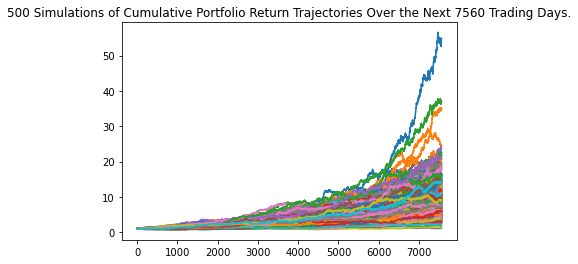

In [21]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

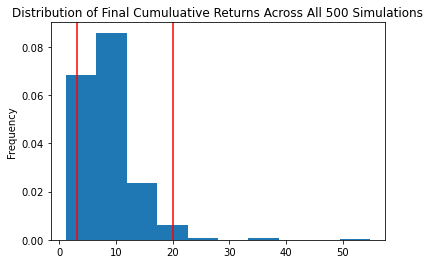

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              8.573527
std               4.853259
min               1.138613
25%               5.553526
50%               7.457060
75%              10.185881
max              54.880141
95% CI Lower      3.196017
95% CI Upper     20.101516
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_mean = round(even_tbl[1]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}, with an average return of {ci_mean}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $63920.33 and $402030.32, with an average return of 171470.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_mean = round(even_tbl[1]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}, with an average return of {ci_mean}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $95880.5 and $603045.48, with an average return of 257205.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0, 1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987750,0.998557,0.998479,1.023633,1.020256,0.988566,1.005608,1.007339,1.006962,0.999808,...,1.000051,0.995600,1.007533,1.013397,0.999957,1.015030,1.002198,0.976782,0.985606,0.987282
2,0.977973,0.979733,0.980146,1.011134,1.003851,0.973448,1.015638,1.007346,1.016940,0.997704,...,0.998521,0.968874,1.035397,0.998104,0.998272,1.023701,1.000226,0.974183,0.974624,0.997857
3,0.956190,0.996311,0.986507,1.010177,1.004569,0.953344,1.022044,1.001927,1.007517,0.986811,...,0.993804,0.959532,1.051720,1.008927,1.014695,1.019052,0.991737,0.964515,0.990245,1.001199
4,0.948884,0.990524,1.006990,1.041752,0.995257,0.952828,1.014031,0.995079,0.986235,0.982810,...,1.002801,0.953634,1.071699,1.007897,1.011330,1.030830,0.996955,0.978603,0.990958,1.010870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.441091,1.337110,4.731087,2.688926,3.477957,0.660468,1.091225,2.224254,2.631500,1.211819,...,1.439533,2.536052,2.738594,1.404937,1.830873,1.675186,3.694093,3.182136,3.997737,1.225274
1257,1.436947,1.305400,4.701276,2.670771,3.458488,0.649930,1.080592,2.178900,2.586536,1.230358,...,1.426558,2.547269,2.695207,1.391817,1.826093,1.703940,3.825600,3.187319,3.940255,1.241512
1258,1.424289,1.332247,4.677823,2.751948,3.392193,0.653256,1.078874,2.150517,2.593225,1.236840,...,1.461745,2.607298,2.688386,1.387286,1.860691,1.704101,3.840620,3.204342,3.990728,1.236360
1259,1.426604,1.343625,4.666363,2.723441,3.468988,0.652048,1.063106,2.192193,2.628902,1.274744,...,1.454376,2.604869,2.651044,1.393864,1.885047,1.682930,3.779188,3.289099,4.007162,1.209362


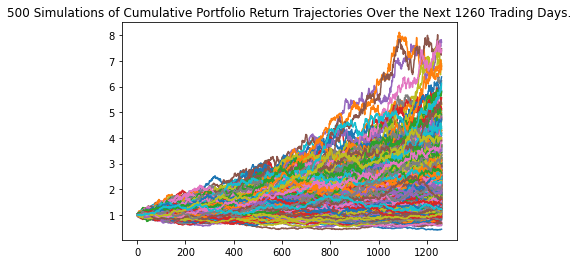

In [28]:
# Plot simulation outcomes
five_line_plot = MC_five_dist.plot_simulation()

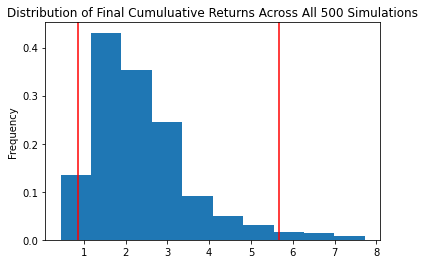

In [29]:
# Plot probability distribution and confidence intervals
five_dist_plot = MC_five_dist.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
five_tbl = MC_five_dist.summarize_cumulative_return()

# Print summary statistics
print(five_tbl)

count           500.000000
mean              2.371239
std               1.202176
min               0.438602
25%               1.517270
50%               2.136733
75%               2.895035
max               7.726918
95% CI Lower      0.856577
95% CI Upper      5.673147
Name: 1260, dtype: float64


In [31]:
# Set initial investment
five_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_tbl[8]*five_initial_investment,2)
ci_mean_five = round(five_tbl[1]*five_initial_investment,2)
ci_upper_five = round(five_tbl[9]*five_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${five_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}, with an average return of {ci_mean_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51394.62 and $340388.85, with an average return of 142274.33


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0, 1],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995324,0.999971,1.003305,1.015176,0.995674,1.012546,0.976326,0.983217,1.019734,0.998956,...,0.979822,0.997444,1.005904,1.028717,1.000366,0.990117,1.010863,1.005938,0.988582,1.010568
2,1.001751,1.009029,1.021549,1.004433,0.987309,1.026505,0.982141,0.975861,1.007907,0.996667,...,0.988332,0.974921,1.012088,1.041912,1.031850,0.998465,1.012015,0.997545,0.987413,0.999878
3,1.021725,1.005648,1.020703,1.008644,1.013124,1.046909,0.978387,0.956340,0.998146,0.999202,...,0.991031,0.967816,1.027334,1.034270,1.020290,0.994950,1.012855,1.004231,0.997153,0.981727
4,1.036578,0.994348,1.030196,1.025023,0.997579,1.045208,0.978211,0.971611,1.004802,1.004807,...,0.995666,0.977128,1.043916,1.033686,1.007614,0.994311,1.020510,1.006816,0.979211,0.988238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.864751,5.054611,2.552420,1.773080,6.205577,9.639391,3.455102,14.197415,3.552848,1.420646,...,6.388517,2.034134,4.259939,13.992429,4.008244,12.437855,0.530112,8.576933,2.630840,1.664149
2517,2.870626,5.104461,2.507857,1.781539,6.304134,9.581023,3.441779,14.218995,3.664426,1.373993,...,6.520911,2.014724,4.357544,13.965076,4.088396,12.368593,0.530393,8.674842,2.552837,1.622097
2518,2.899381,5.090768,2.541493,1.767484,6.443609,9.436332,3.410928,14.101173,3.648170,1.382004,...,6.614244,2.035355,4.268411,13.610833,4.033650,12.306107,0.535377,8.675261,2.560040,1.628850
2519,2.861843,5.117571,2.561281,1.751770,6.537710,9.282915,3.390813,14.388699,3.585144,1.366314,...,6.599870,2.025004,4.220858,13.694534,4.003296,12.225077,0.524436,8.705448,2.552838,1.589727


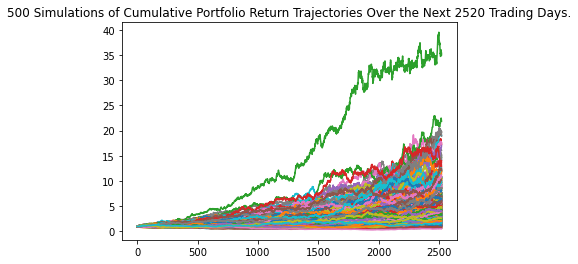

In [34]:
# Plot simulation outcomes
ten_line_plot = MC_ten_dist.plot_simulation()

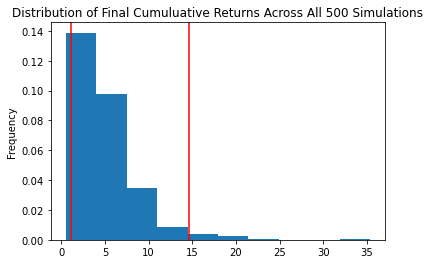

In [35]:
# Plot probability distribution and confidence intervals
ten_dist_plot = MC_ten_dist.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_tbl = MC_ten_dist.summarize_cumulative_return()

# Print summary statistics
print(ten_tbl)

count           500.000000
mean              5.030120
std               3.680497
min               0.512611
25%               2.533162
50%               4.114159
75%               6.221163
max              35.377352
95% CI Lower      1.091004
95% CI Upper     14.571260
Name: 2520, dtype: float64


In [37]:
# Set initial investment
ten_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_tbl[8]*ten_initial_investment,2)
ci_mean_ten = round(ten_tbl[1]*ten_initial_investment,2)
ci_upper_ten = round(ten_tbl[9]*ten_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${ten_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}, with an average return of {ci_mean_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $65460.23 and $874275.62, with an average return of 301807.22
